In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import shapefile as shp
import json
import requests
import folium
import datetime

# sklearn imports
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn import datasets, metrics, model_selection, svm
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression


from bokeh.models import ColumnDataSource,FactorRange
from bokeh.plotting import figure
from bokeh.models import Panel, Tabs
from bokeh.io import output_file, show
from bokeh.io import curdoc
from bokeh.io import output_notebook
from bokeh.models import Legend
from bokeh.palettes import Spectral6
from bokeh.transform import factor_cmap
from bokeh.palettes import Category20_14 as palette
from bokeh.palettes import Category20b_14 as palette2
import itertools
from bokeh.models.tools import HoverTool
from bokeh.layouts import row,column
from bokeh.models import CustomJS
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")


sns.set(style= 'whitegrid', palette='pastel', color_codes=True)
sns.mpl.rc('figure', figsize=(10,6))
# Set a plot style for nice plots.
plt.style.use('ggplot')

# Magic command useful jupyter notebook
%matplotlib inline

#Set plot size.
plt.rcParams['figure.figsize'] = [13,7]

#Set font size
plt.rcParams.update({'font.size':16})

Link to the website where the motor vehicle data was found [Crash Data](https://data.cityofnewyork.us/Public-Safety/Motor-Vehicle-Collisions-Crashes/h9gi-nx95), [Vehicle Data](https://data.cityofnewyork.us/Public-Safety/Motor-Vehicle-Collisions-Vehicles/bm4k-52h4) and [Persons Data](https://data.cityofnewyork.us/Public-Safety/Motor-Vehicle-Collisions-Person/f55k-p6yu)

In [5]:
df_crash = pd.read_csv('data/crash_clean.csv')
df_vehicle = pd.read_csv('data/vehicle_clean.csv')
df_persons = pd.read_csv('data/people_clean.csv')

In [6]:
df_crash['CRASH DATE'] = pd.to_datetime(df_crash['CRASH DATE'],errors='coerce')
df_crash['CRASH TIME'] = pd.to_datetime(df_crash['CRASH TIME'],errors='coerce')

In [7]:
df_crash.head()

,Unnamed: 0,CRASH DATE,CRASH TIME,BOROUGH,LATITUDE,LONGITUDE,ON STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2
0,1,2016-06-01,2020-05-12 13:54:00,QUEENS,40.655834,-73.839035,CROSS BAY BOULEVARD,0.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,Driver Inattention/Distraction,3453947,PASSENGER VEHICLE,PASSENGER VEHICLE
1,2,2016-05-23,2020-05-12 06:15:00,Unspecified,40.752937,-73.922040,NORTHERN BOULEVARD,0.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,3452402,PASSENGER VEHICLE,PASSENGER VEHICLE
2,3,2016-06-03,2020-05-12 11:00:00,Unspecified,40.680893,-73.871376,GLEN STREET,1.0,0.0,1,0,0,0,0,0,Failure to Yield Right-of-Way,Unspecified,3482311,PASSENGER VEHICLE,Unspecified
3,4,2016-06-03,2020-05-12 17:15:00,QUEENS,40.665558,-73.729850,HOOK CREEK BOULEVARD,0.0,0.0,0,0,0,0,0,0,Unspecified,Unspecified,3455499,PASSENGER VEHICLE,PASSENGER VEHICLE
4,5,2016-06-04,2020-05-12 13:20:00,BROOKLYN,40.689530,-73.909134,Unspecified,0.0,0.0,0,0,0,0,0,0,Passing Too Closely,Unspecified,3455042,PASSENGER VEHICLE,PASSENGER VEHICLE


In [8]:
pd.set_option('display.max_rows', 500)

In [9]:
df_crash['VEHICLE TYPE CODE 1'] = df_crash['VEHICLE TYPE CODE 1'].str.replace('TAXI','Taxi')
df_crash['VEHICLE TYPE CODE 1'] = df_crash['VEHICLE TYPE CODE 1'].str.replace('SPORT UTILITY / STATION WAGON','Station Wagon')
df_crash['VEHICLE TYPE CODE 1'] = df_crash['VEHICLE TYPE CODE 1'].str.replace('Station Wagon/Sport Utility Vehicle','Station Wagon')
df_crash['VEHICLE TYPE CODE 1'] = df_crash['VEHICLE TYPE CODE 1'].str.replace('4 dr sedan','Sedan')
df_crash['VEHICLE TYPE CODE 1'] = df_crash['VEHICLE TYPE CODE 1'].str.replace('2 dr sedan','Sedan')
df_crash['VEHICLE TYPE CODE 1'] = df_crash['VEHICLE TYPE CODE 1'].str.replace('VAN','Van')
df_crash['VEHICLE TYPE CODE 1'] = df_crash['VEHICLE TYPE CODE 1'].str.replace('van','Van')
df_crash['VEHICLE TYPE CODE 1'] = df_crash['VEHICLE TYPE CODE 1'].str.replace('VN','Van')
df_crash['VEHICLE TYPE CODE 1'] = df_crash['VEHICLE TYPE CODE 1'].str.replace('MOTORCYCLE','Motorcycle')
df_crash['VEHICLE TYPE CODE 1'] = df_crash['VEHICLE TYPE CODE 1'].str.replace('Motorbike','Motorcycle')
df_crash['VEHICLE TYPE CODE 1'] = df_crash['VEHICLE TYPE CODE 1'].str.replace('ambul','Ambulance')
df_crash['VEHICLE TYPE CODE 1'] = df_crash['VEHICLE TYPE CODE 1'].str.replace('Ambul','Ambulance')
df_crash['VEHICLE TYPE CODE 1'] = df_crash['VEHICLE TYPE CODE 1'].str.replace('AMBUL','Ambulance')
df_crash['VEHICLE TYPE CODE 1'] = df_crash['VEHICLE TYPE CODE 1'].str.replace('AmbulanceANCE','Ambulance')
df_crash['VEHICLE TYPE CODE 1'] = df_crash['VEHICLE TYPE CODE 1'].str.replace('Ambulanceance','Ambulance')
df_crash['VEHICLE TYPE CODE 1'] = df_crash['VEHICLE TYPE CODE 1'].str.replace('AM','Ambulance')
df_crash['VEHICLE TYPE CODE 1'] = df_crash['VEHICLE TYPE CODE 1'].str.replace('Fire','Firetruck')
df_crash['VEHICLE TYPE CODE 1'] = df_crash['VEHICLE TYPE CODE 1'].str.replace('FIRE','Firetruck')
df_crash['VEHICLE TYPE CODE 1'] = df_crash['VEHICLE TYPE CODE 1'].str.replace('FIRE TRUCK','Firetruck') 
df_crash['VEHICLE TYPE CODE 1'] = df_crash['VEHICLE TYPE CODE 1'].str.replace('Firetruck TRUCK','Firetruck')
df_crash['VEHICLE TYPE CODE 1'] = df_crash['VEHICLE TYPE CODE 1'].str.replace('BUS','Bus')
df_crash['VEHICLE TYPE CODE 1'] = df_crash['VEHICLE TYPE CODE 1'].str.replace('BU','Bus')
df_crash['VEHICLE TYPE CODE 1'] = df_crash['VEHICLE TYPE CODE 1'].str.replace('BICYCLE','Bicycle')
df_crash['VEHICLE TYPE CODE 1'] = df_crash['VEHICLE TYPE CODE 1'].str.replace('Bike','Bicycle')
df_crash['VEHICLE TYPE CODE 1'] = df_crash['VEHICLE TYPE CODE 1'].str.replace('PICK-UP TRUCK','Pick-up Truck')
df_crash['VEHICLE TYPE CODE 1'] = df_crash['VEHICLE TYPE CODE 1'].str.replace('TK','Pick-up Truck')
df_crash['VEHICLE TYPE CODE 1'] = df_crash['VEHICLE TYPE CODE 1'].str.replace('LIVERY VEHICLE','Livery Vehicle')

In [10]:
df_crash.groupby(df_crash['VEHICLE TYPE CODE 1']).size().sort_values(ascending=False)

VEHICLE TYPE CODE 1
PASSENGER VEHICLE    609578
Station Wagon        416268
Sedan                171518
Taxi                  64978
Pick-up Truck         34099
                      ...  
SANTI                     1
SC                        1
SCOO                      1
SEA                       1
(ceme                     1
Length: 667, dtype: int64

In [11]:
df_crash.groupby(df_crash['BOROUGH']).size().sort_values(ascending=False)

BOROUGH
BROOKLYN         353631
Unspecified      337794
QUEENS           304010
MANHATTAN        267646
BRONX            158131
STATEN ISLAND     48272
dtype: int64

In [12]:
df_crash.groupby(df_crash['CONTRIBUTING FACTOR VEHICLE 1']).size().sort_values(ascending=False)

CONTRIBUTING FACTOR VEHICLE 1
Unspecified                                              533483
Driver Inattention/Distraction                           282231
Failure to Yield Right-of-Way                             86901
Following Too Closely                                     73920
Backing Unsafely                                          58167
Other Vehicular                                           46560
Fatigued/Drowsy                                           37319
Passing or Lane Usage Improper                            36448
Turning Improperly                                        36088
Passing Too Closely                                       34544
Unsafe Lane Changing                                      28203
Traffic Control Disregarded                               22351
Driver Inexperience                                       21809
Lost Consciousness                                        16747
Pavement Slippery                                         14162
Alcohol In

In [13]:
focusviolations = set(df_crash.groupby(df_crash['CONTRIBUTING FACTOR VEHICLE 1']).size().sort_values(ascending=False).index.to_list()[1:15])

In [14]:

focusvehicles = set(df_crash.groupby(df_crash['VEHICLE TYPE CODE 1']).size().sort_values(ascending=False).index.to_list()[1:16])

# Monster Bokeh plots of contributing factors and vehicle types

In [12]:
output_file("Crashes_hours_weeks_months.html")
df_hourlycrash = df_crash[['CONTRIBUTING FACTOR VEHICLE 1','CRASH TIME','COLLISION_ID']]
df_hourlycrash_vehicle = df_crash[['VEHICLE TYPE CODE 1','CRASH TIME','COLLISION_ID']]
df_hourlycrash['CRASH TIME'] = df_crash['CRASH TIME'].dt.hour
df_hourlycrash_vehicle['CRASH TIME'] = df_crash['CRASH TIME'].dt.hour

df_hourlycrash = pd.pivot_table(df_hourlycrash,values = 'COLLISION_ID',index = ['CRASH TIME'],columns = ['CONTRIBUTING FACTOR VEHICLE 1'],aggfunc = 'count').fillna(0)
df_hourlycrash_vehicle = pd.pivot_table(df_hourlycrash_vehicle,values = 'COLLISION_ID',index = ['CRASH TIME'],columns = ['VEHICLE TYPE CODE 1'],aggfunc = 'count').fillna(0)

Total = df_crash.groupby('CONTRIBUTING FACTOR VEHICLE 1').size()
Total_vehicle = df_crash.groupby('VEHICLE TYPE CODE 1').size()

df_hourlycrash = df_hourlycrash.div(Total,axis=1)
df_hourlycrash_vehicle = df_hourlycrash_vehicle.div(Total_vehicle,axis=1)

source1 = ColumnDataSource(df_hourlycrash)
source_vehicle1 = ColumnDataSource(df_hourlycrash_vehicle)
hours = [str(elem+1) for elem in df_hourlycrash.index.to_list()]


df_weeklycrash = df_crash[['CONTRIBUTING FACTOR VEHICLE 1','CRASH DATE','COLLISION_ID']]
df_weeklycrash_vehicle = df_crash[['VEHICLE TYPE CODE 1','CRASH DATE','COLLISION_ID']]
df_weeklycrash['CRASH DATE'] = df_crash['CRASH DATE'].dt.dayofweek
df_weeklycrash_vehicle['CRASH DATE'] = df_crash['CRASH DATE'].dt.dayofweek
df_weeklycrash['CRASH DATE'] = df_weeklycrash['CRASH DATE'].map({0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday' ,4:'Friday' ,5:'Saturday' ,6:'Sunday'})
df_weeklycrash_vehicle['CRASH DATE'] = df_weeklycrash_vehicle['CRASH DATE'].map({0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday' ,4:'Friday' ,5:'Saturday' ,6:'Sunday'})
df_weeklycrash = pd.pivot_table(df_weeklycrash,values = 'COLLISION_ID',index = ['CRASH DATE'],columns = ['CONTRIBUTING FACTOR VEHICLE 1'],aggfunc = 'count').fillna(0)
df_weeklycrash_vehicle = pd.pivot_table(df_weeklycrash_vehicle,values = 'COLLISION_ID',index = ['CRASH DATE'],columns = ['VEHICLE TYPE CODE 1'],aggfunc = 'count').fillna(0)

Total = df_crash.groupby('CONTRIBUTING FACTOR VEHICLE 1').size()
Total_vehicle = df_crash.groupby('VEHICLE TYPE CODE 1').size()

df_weeklycrash = df_weeklycrash.div(Total,axis=1)
df_weeklycrash_vehicle = df_weeklycrash_vehicle.div(Total_vehicle,axis=1)

source2 = ColumnDataSource(df_weeklycrash)
source_vehicle2 = ColumnDataSource(df_weeklycrash_vehicle)
DaysOfWeek = df_weeklycrash.index.tolist()
correct_order = [1,5,6,4,0,2,3]
DaysOfWeek = [DaysOfWeek[i] for i in correct_order]


df_monthlycrash = df_crash[['CONTRIBUTING FACTOR VEHICLE 1','CRASH DATE','COLLISION_ID']]
df_monthlycrash_vehicle = df_crash[['VEHICLE TYPE CODE 1','CRASH DATE','COLLISION_ID']]
df_monthlycrash['CRASH DATE'] = df_crash['CRASH DATE'].dt.month
df_monthlycrash_vehicle['CRASH DATE'] = df_crash['CRASH DATE'].dt.month
df_monthlycrash['CRASH DATE'] = df_monthlycrash['CRASH DATE'].map({1:'January',2:'February',3:'March',4:'April' ,5:'May' ,6:'June' ,7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'})
df_monthlycrash_vehicle['CRASH DATE'] = df_monthlycrash_vehicle['CRASH DATE'].map({1:'January',2:'February',3:'March',4:'April' ,5:'May' ,6:'June' ,7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'})


df_monthlycrash = pd.pivot_table(df_monthlycrash,values = 'COLLISION_ID',index = ['CRASH DATE'],columns = ['CONTRIBUTING FACTOR VEHICLE 1'],aggfunc = 'count').fillna(0)
df_monthlycrash_vehicle = pd.pivot_table(df_monthlycrash_vehicle,values = 'COLLISION_ID',index = ['CRASH DATE'],columns = ['VEHICLE TYPE CODE 1'],aggfunc = 'count').fillna(0)

Total = df_crash.groupby('CONTRIBUTING FACTOR VEHICLE 1').size()
Total_vehicle = df_crash.groupby('VEHICLE TYPE CODE 1').size()

df_monthlycrash = df_monthlycrash.div(Total,axis=1)
df_monthlycrash_vehicle = df_monthlycrash_vehicle.div(Total_vehicle,axis=1)

source3 = ColumnDataSource(df_monthlycrash)
source_vehicle3 = ColumnDataSource(df_monthlycrash_vehicle)
Months = df_monthlycrash_vehicle.index.tolist()
correct_order = [4,3,7,0,8,6,5,1,11,10,9,2]
Months = [Months[i] for i in correct_order]
color = itertools.cycle(palette)

output_notebook()

Loading BokehJS ...

In [13]:
p1 = figure(x_range = FactorRange(factors=hours), plot_height=500,plot_width=900, title="Crashes per hour")
bar ={} # to store vbars
items = []
for indx,i in enumerate(zip(focusviolations,color)):
    bar[i[0]] = p1.vbar(x='CRASH TIME',  top=i[0], source= source1,color=i[1], width = 0.5,  muted_alpha=False, muted = True)
    items.append((i[0],[bar[i[0]]]))
p1.xaxis.axis_label = 'Hour of the day'
p1.yaxis.axis_label = 'Normalized values'
legend1 = Legend(items=items,click_policy = 'mute', location=(0, 20))
p1.add_layout(legend1, 'left')
tab1 = Panel(child=p1, title="Violations by hours")


p2 = figure(x_range = FactorRange(factors=hours), plot_height=500,plot_width=900, title="Crashes per hour")
bar ={} # to store vbars
items = []
for indx,i in enumerate(zip(focusvehicles,color)):
    bar[i[0]] = p2.vbar(x='CRASH TIME',  top=i[0], source= source_vehicle1,color=i[1], width = 0.5,  muted_alpha=False, muted = True)
    items.append((i[0],[bar[i[0]]]))
p2.xaxis.axis_label = 'Hour of the day'
p2.yaxis.axis_label = 'Normalized values'
legend2 = Legend(items=items,click_policy = 'mute', location=(0, 20))
p2.add_layout(legend2, 'right')
tab2 = Panel(child=p2, title="Vehicle Types by hours")


p3 = figure(x_range = FactorRange(factors=DaysOfWeek), plot_height=500,plot_width=900, title="Crashes each day")
bar ={} # to store vbars
items = []
for indx,i in enumerate(zip(focusviolations,color)):
    bar[i[0]] = p3.vbar(x='CRASH DATE',  top=i[0], source= source2,color=i[1], width = 0.5,  muted_alpha=False, muted = True)
    items.append((i[0],[bar[i[0]]]))
p3.xaxis.axis_label = 'Day of the week'
p3.yaxis.axis_label = 'Normalized values'
legend3 = Legend(items=items,click_policy = 'mute', location=(0, 20))
p3.add_layout(legend3, 'left')
tab3 = Panel(child=p3, title="Violations by week")


p4 = figure(x_range = FactorRange(factors=DaysOfWeek), plot_height=500,plot_width=900, title="Crashes each day")
bar ={} # to store vbars
items = []
for indx,i in enumerate(zip(focusvehicles,color)):
    bar[i[0]] = p4.vbar(x='CRASH DATE',  top=i[0], source= source_vehicle2,color=i[1], width = 0.5,  muted_alpha=False, muted = True)
    items.append((i[0],[bar[i[0]]]))
p4.xaxis.axis_label = 'Day of the week'
p4.yaxis.axis_label = 'Normalized values'
legend4 = Legend(items=items,click_policy = 'mute', location=(0, 20))
p4.add_layout(legend4, 'right')
tab4 = Panel(child=p4, title="Vehicle Types by week")


p5 = figure(x_range = FactorRange(factors=Months), plot_height=500,plot_width=900, title="Crashes each month")
bar ={} # to store vbars
items = []
for indx,i in enumerate(zip(focusviolations,color)):
    bar[i[0]] = p5.vbar(x='CRASH DATE',  top=i[0], source= source3,color=i[1], width = 0.5,  muted_alpha=False, muted = True)
    items.append((i[0],[bar[i[0]]]))
p5.xaxis.axis_label = 'Months'
p5.yaxis.axis_label = 'Normalized values'
legend5 = Legend(items=items,click_policy = 'mute', location=(0, 20))
p5.add_layout(legend5, 'left')
p5.xaxis.major_label_orientation = np.pi/4
tab5 = Panel(child=p5, title="Violations by month")


p6 = figure(x_range = FactorRange(factors=Months), plot_height=500,plot_width=900, title="Crashes each month")
bar ={} # to store vbars
items = []
for indx,i in enumerate(zip(focusvehicles,color)):
    bar[i[0]] = p6.vbar(x='CRASH DATE',  top=i[0], source= source_vehicle3,color=i[1], width = 0.5,  muted_alpha=False, muted = True)
    items.append((i[0],[bar[i[0]]]))
p6.xaxis.axis_label = 'Months'
p6.yaxis.axis_label = 'Normalized values'
legend6 = Legend(items=items,click_policy = 'mute', location=(0, 20))
p6.add_layout(legend6, 'right')
p6.xaxis.major_label_orientation = np.pi/4
tab6 = Panel(child=p6, title="Vehicle Types by month")

In [14]:
tabs1 = Tabs(tabs=[ tab1, tab3, tab5 ])
tabs2 = Tabs(tabs=[ tab2, tab4, tab6 ])

show(column(tabs1, tabs2))

# Stacked Bokeh plot with crashes as a function of age distributed across males and females

In [15]:
df_persons = df_persons[~df_persons['PERSON_AGE'].isin(['Unspecified'])]
df_persons = df_persons[~df_persons['PERSON_SEX'].isin(['Unspecified'])]
df_persons["PERSON_AGE"] = pd.to_numeric(df_persons["PERSON_AGE"], downcast="float")
df_persons = df_persons.loc[(df_persons['PERSON_AGE']>np.float(0.0)) & (df_persons['PERSON_AGE'] < np.float(100.0) )]
df_persons = df_persons.loc[(df_persons['PED_ROLE'] == 'Driver')]

In [16]:
df_sort = df_persons.groupby(['COLLISION_ID','PERSON_TYPE'],as_index=False).agg({'PERSON_AGE': ['min', 'max'],'PERSON_SEX': ['first','last']})

In [17]:
df_sort = df_sort[df_sort['COLLISION_ID'].notnull() == True].set_index('COLLISION_ID')
df_crash2 = df_crash[df_crash['COLLISION_ID'].notnull() == True].set_index('COLLISION_ID')

In [18]:
df_merged = pd.merge(df_crash2,df_sort, how='inner', left_index=True, right_index=True)

In [19]:
df_merged = df_merged.rename(columns = {df_merged.columns[-1] : 'PERSON_SEX2'})
df_merged = df_merged.rename(columns = {df_merged.columns[-2] : 'PERSON_SEX1'})
df_merged = df_merged.rename(columns = {df_merged.columns[-3] : 'PERSON_AGE2'})
df_merged = df_merged.rename(columns = {df_merged.columns[-4] : 'PERSON_AGE1'})
df_merged = df_merged.rename(columns = {df_merged.columns[-5] : 'PERSON_TYPE'})

In [20]:
df_pre = df_merged[['PERSON_AGE1','PERSON_SEX1','BOROUGH']]
df_pre = pd.pivot_table(df_pre, values='BOROUGH', index=['PERSON_AGE1'], columns=['PERSON_SEX1'], aggfunc='count').fillna(0)
age = [str(elem+1) for elem in df_pre.index.to_list()]
Total = df_merged.groupby('PERSON_SEX1').size()
df_pre = df_pre.div(Total,axis=1)
df_pre = df_pre.iloc[:,[0,1]] # removing unspecified børger
source = ColumnDataSource(df_pre)
stacks = df_pre.columns.to_list()
output_notebook()

Loading BokehJS ...

In [21]:
TOOLTIPS = [("PERSON_SEX1","$name"), ("Fraction","@$name")]
p = figure(x_range = FactorRange(factors = age),width=850,plot_height=500, tooltips=TOOLTIPS)
p.vbar_stack(stackers=stacks,x = 'PERSON_AGE1', color=['chocolate', 'steelblue'],width = 0.9,source= source)
p.xaxis.major_label_orientation = np.pi/2
show(p) #displays your plot

In [22]:
df_pre1 = df_merged[['PERSON_AGE1','PERSON_SEX1','BOROUGH']]
df_pre1["PERSON_AGE1"] = pd.to_numeric(df_pre1["PERSON_AGE1"], downcast="integer")
def agefunc(x):
    if x <=5:
        x = '0-5'
    elif x > 5 and x <= 10:
        x = '5-9'
    elif x > 10 and x <= 15:
        x = '10-14'
    elif x > 15 and x <= 20:
        x = '15-19'
    elif x > 20 and x <= 25:
        x = '20-24'
    elif x > 25 and x <= 30:
        x = '25-29'
    elif x > 30 and x <=35:
        x = '30-34'    
    elif x > 35 and x <= 40:
        x = '35-39'
    elif x > 40 and x <= 45:
        x = '40-44'    
    elif x > 45 and x <= 50:
        x = '45-49'    
    elif x > 50 and x <= 55:
        x = '50-54'    
    elif x > 55 and x <= 60:
        x = '55-59'
    elif x > 60 and x <= 65:
        x = '60-64'
    elif x > 65 and x <= 70:
        x = '65-69'
    elif x > 70 and x <= 75:
        x = '70-74'
    elif x > 75 and x <= 80:
        x = '75-79'    
    elif x > 80 and x <= 85:
        x = '80-84'
    elif x > 85:
        x = '85 and over'
    return x

df_pre1['GROUPED_AGE'] = df_pre1['PERSON_AGE1'].apply(agefunc)

In [23]:
df_pre1 = pd.pivot_table(df_pre1, values='BOROUGH', index=['GROUPED_AGE'], columns=['PERSON_SEX1'], aggfunc='count').fillna(0)
df_pre1 = df_pre1.iloc[:,[0,1]] # removing unspecified børger


In [24]:
age_tot_male = 4112539
age_tot_female = 4510159
df_dist = pd.DataFrame({'F_dist': [6.4*age_tot_female/100, 5.5*age_tot_female/100, 5.6*age_tot_female/100, 5.3*age_tot_female/100, 6.7*age_tot_female/100, 9.4*age_tot_female/100, 8.6*age_tot_female/100, 7.3*age_tot_female/100, 6.4*age_tot_female/100, 6.4*age_tot_female/100, 6.4*age_tot_female/100, 6.0*age_tot_female/100, 5.7*age_tot_female/100, 4.6*age_tot_female/100, 3.4*age_tot_female/100, 2.6*age_tot_female/100, 1.8*age_tot_female/100, 2.0*age_tot_female/100],
                             'M_dist': [6.4*age_tot_male/100, 5.5*age_tot_male/100, 5.6*age_tot_male/100, 5.3*age_tot_male/100, 6.7*age_tot_male/100, 9.4*age_tot_male/100, 8.6*age_tot_male/100, 7.3*age_tot_male/100, 6.4*age_tot_male/100, 6.4*age_tot_male/100, 6.4*age_tot_male/100, 6.0*age_tot_male/100, 5.7*age_tot_male/100, 4.6*age_tot_male/100, 3.4*age_tot_male/100, 2.6*age_tot_male/100, 1.8*age_tot_male/100, 2.0*age_tot_male/100]},
                            index=[['0-5','5-9','10-14', '15-19', '20-24', '25-29', '30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69','70-74','75-79','80-84','85 and over']])

In [25]:
df_dist = df_dist/1000 

In [26]:
df_pre2 = df_pre1.iloc[[0,9,1,2,3,4,5,6,7,8,10,11,12,13,14,15,16,17]] 

In [27]:
age = df_pre2.index.tolist()
df_pre2 = df_pre2.div(df_dist.values, axis = 1) # Looking at crashes pr. 1000 peoples
source = ColumnDataSource(df_pre2)
stacks = df_pre2.columns.to_list()
output_notebook()

Loading BokehJS ...

In [30]:
TOOLTIPS = [("P","$name"), ("Fraction","@$name")]
p = figure(x_range = FactorRange(factors = age),width=850,plot_height=500, tooltips=TOOLTIPS, title="Crashes for different age groups from 2012 to 2019")
p.vbar_stack(stackers=stacks,x = 'GROUPED_AGE', color=['chocolate', 'steelblue'],width = 0.9,source= source)
p.xaxis.major_label_orientation = np.pi/4
p.xaxis.axis_label = 'Age Groups'
p.yaxis.axis_label = 'Crashes per 1000 peoples'
output_file("docs/Crashes_agegroups.html",mode="inline")
show(p) #displays your plot

# Machine Learning

In [42]:
df_crash = pd.read_csv('crash_clean.csv')
df_vehicle = pd.read_csv('vehicle_clean.csv')
df_persons = pd.read_csv('people_clean.csv')

In [43]:
df_crash['VEHICLE TYPE CODE 1'] = df_crash['VEHICLE TYPE CODE 1'].str.replace('TAXI','Taxi')
df_crash['VEHICLE TYPE CODE 1'] = df_crash['VEHICLE TYPE CODE 1'].str.replace('SPORT UTILITY / STATION WAGON','Station Wagon')
df_crash['VEHICLE TYPE CODE 1'] = df_crash['VEHICLE TYPE CODE 1'].str.replace('Station Wagon/Sport Utility Vehicle','Station Wagon')
df_crash['VEHICLE TYPE CODE 1'] = df_crash['VEHICLE TYPE CODE 1'].str.replace('4 dr sedan','Sedan')
df_crash['VEHICLE TYPE CODE 1'] = df_crash['VEHICLE TYPE CODE 1'].str.replace('2 dr sedan','Sedan')
df_crash['VEHICLE TYPE CODE 1'] = df_crash['VEHICLE TYPE CODE 1'].str.replace('VAN','Van')
df_crash['VEHICLE TYPE CODE 1'] = df_crash['VEHICLE TYPE CODE 1'].str.replace('van','Van')
df_crash['VEHICLE TYPE CODE 1'] = df_crash['VEHICLE TYPE CODE 1'].str.replace('VN','Van')
df_crash['VEHICLE TYPE CODE 1'] = df_crash['VEHICLE TYPE CODE 1'].str.replace('MOTORCYCLE','Motorcycle')
df_crash['VEHICLE TYPE CODE 1'] = df_crash['VEHICLE TYPE CODE 1'].str.replace('Motorbike','Motorcycle')
df_crash['VEHICLE TYPE CODE 1'] = df_crash['VEHICLE TYPE CODE 1'].str.replace('ambul','Ambulance')
df_crash['VEHICLE TYPE CODE 1'] = df_crash['VEHICLE TYPE CODE 1'].str.replace('Ambul','Ambulance')
df_crash['VEHICLE TYPE CODE 1'] = df_crash['VEHICLE TYPE CODE 1'].str.replace('AMBUL','Ambulance')
df_crash['VEHICLE TYPE CODE 1'] = df_crash['VEHICLE TYPE CODE 1'].str.replace('AmbulanceANCE','Ambulance')
df_crash['VEHICLE TYPE CODE 1'] = df_crash['VEHICLE TYPE CODE 1'].str.replace('Ambulanceance','Ambulance')
df_crash['VEHICLE TYPE CODE 1'] = df_crash['VEHICLE TYPE CODE 1'].str.replace('AM','Ambulance')
df_crash['VEHICLE TYPE CODE 1'] = df_crash['VEHICLE TYPE CODE 1'].str.replace('Fire','Firetruck')
df_crash['VEHICLE TYPE CODE 1'] = df_crash['VEHICLE TYPE CODE 1'].str.replace('FIRE','Firetruck')
df_crash['VEHICLE TYPE CODE 1'] = df_crash['VEHICLE TYPE CODE 1'].str.replace('FIRE TRUCK','Firetruck') 
df_crash['VEHICLE TYPE CODE 1'] = df_crash['VEHICLE TYPE CODE 1'].str.replace('Firetruck TRUCK','Firetruck')
df_crash['VEHICLE TYPE CODE 1'] = df_crash['VEHICLE TYPE CODE 1'].str.replace('BUS','Bus')
df_crash['VEHICLE TYPE CODE 1'] = df_crash['VEHICLE TYPE CODE 1'].str.replace('BU','Bus')
df_crash['VEHICLE TYPE CODE 1'] = df_crash['VEHICLE TYPE CODE 1'].str.replace('BICYCLE','Bicycle')
df_crash['VEHICLE TYPE CODE 1'] = df_crash['VEHICLE TYPE CODE 1'].str.replace('Bike','Bicycle')
df_crash['VEHICLE TYPE CODE 1'] = df_crash['VEHICLE TYPE CODE 1'].str.replace('PICK-UP TRUCK','Pick-up Truck')
df_crash['VEHICLE TYPE CODE 1'] = df_crash['VEHICLE TYPE CODE 1'].str.replace('TK','Pick-up Truck')
df_crash['VEHICLE TYPE CODE 1'] = df_crash['VEHICLE TYPE CODE 1'].str.replace('LIVERY VEHICLE','Livery Vehicle')

In [44]:
focusviolations = set(df_crash.groupby(df_crash['CONTRIBUTING FACTOR VEHICLE 1']).size().sort_values(ascending=False).index.to_list()[1:15])
focusvehicles = set(df_crash.groupby(df_crash['VEHICLE TYPE CODE 1']).size().sort_values(ascending=False).index.to_list()[1:16])

In [45]:
df_crash['CRASH DATE'] = pd.to_datetime(df_crash['CRASH DATE'],errors='coerce')
df_crash['CRASH TIME'] = pd.to_datetime(df_crash['CRASH TIME'],errors='coerce')
df_crash = df_crash[df_crash['CONTRIBUTING FACTOR VEHICLE 1'].isin(focusviolations)]
df_crash= df_crash[df_crash['VEHICLE TYPE CODE 1'].isin(focusvehicles)]

In [46]:
df_persons = df_persons[~df_persons['PERSON_AGE'].isin(['Unspecified'])]
df_persons = df_persons[~df_persons['PERSON_SEX'].isin(['Unspecified'])]
df_persons["PERSON_AGE"] = pd.to_numeric(df_persons["PERSON_AGE"], downcast="float")
df_persons = df_persons.loc[(df_persons['PERSON_AGE']>np.float(0.0)) & (df_persons['PERSON_AGE'] < np.float(100.0) )]
df_persons = df_persons.loc[(df_persons['PED_ROLE'] == 'Driver')]

In [47]:
df_sort = df_persons.groupby(['COLLISION_ID','PERSON_TYPE'],as_index=False).agg({'PERSON_AGE': ['min', 'max'],'PERSON_SEX': ['first','last']})

In [48]:
df_sort = df_sort[df_sort['COLLISION_ID'].notnull() == True].set_index('COLLISION_ID')
df_crash2 = df_crash[df_crash['COLLISION_ID'].notnull() == True].set_index('COLLISION_ID')
df_merged = pd.merge(df_crash2,df_sort, how='inner', left_index=True, right_index=True)

In [49]:
df_merged = df_merged.rename(columns = {df_merged.columns[-1] : 'PERSON_SEX2'})
df_merged = df_merged.rename(columns = {df_merged.columns[-2] : 'PERSON_SEX1'})
df_merged = df_merged.rename(columns = {df_merged.columns[-3] : 'PERSON_AGE2'})
df_merged = df_merged.rename(columns = {df_merged.columns[-4] : 'PERSON_AGE1'})
df_merged = df_merged.rename(columns = {df_merged.columns[-5] : 'PERSON_TYPE'})
df_merged = df_merged[~df_merged['NUMBER OF PERSONS KILLED'].isin(['Unspecified'])]
df_merged['NUMBER OF PERSONS KILLED'] = pd.to_numeric(df_merged['NUMBER OF PERSONS KILLED'], downcast="float")
df_merged['NUMBER OF PERSONS INJURED'] = pd.to_numeric(df_merged['NUMBER OF PERSONS INJURED'], downcast="float")

In [50]:
df_merged.head()

,Unnamed: 0,CRASH DATE,CRASH TIME,BOROUGH,LATITUDE,LONGITUDE,ON STREET NAME,CROSS STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,...,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,PERSON_TYPE,PERSON_AGE1,PERSON_AGE2,PERSON_SEX1,PERSON_SEX2
COLLISION_ID,,,,,,,,,,,,,,,,,,,,,
3405409,46586,2016-04-07,2020-05-05 12:00:00,MANHATTAN,40.725674,-74.005780,VARICK STREET,SPRING STREET,0.0,0.0,...,0,Backing Unsafely,Unspecified,UNKNOWN,Unspecified,Occupant,68.0,68.0,M,M
3405471,34898,2016-04-14,2020-05-05 17:22:00,MANHATTAN,40.715954,-73.986725,GRAND STREET,GREENE STREET,0.0,0.0,...,0,Passing Too Closely,Unspecified,Motorcycle,PASSENGER VEHICLE,Occupant,35.0,39.0,M,M
3405619,401904,2016-03-16,2020-05-05 06:51:00,MANHATTAN,40.718430,-74.000534,CANAL STREET,LAFAYETTE STREET,1.0,0.0,...,0,Driver Inattention/Distraction,Unspecified,LARGE COM VEH(6 OR MORE TIRES),PASSENGER VEHICLE,Occupant,30.0,46.0,M,M
3406362,40104,2016-03-30,2020-05-05 19:00:00,MANHATTAN,40.732346,-73.984950,EAST 14 STREET,1 AVENUE,1.0,0.0,...,0,Following Too Closely,Unspecified,OTHER,Unspecified,Occupant,24.0,24.0,M,M
3406382,39720,2016-04-03,2020-05-05 14:40:00,MANHATTAN,40.728780,-73.984460,1 AVENUE,EAST 10 STREET,0.0,0.0,...,0,Driver Inattention/Distraction,Passing or Lane Usage Improper,OTHER,PASSENGER VEHICLE,Occupant,40.0,65.0,F,M


In [51]:
df_ML = df_merged[['CRASH DATE','CRASH TIME','LATITUDE','LONGITUDE','NUMBER OF PERSONS KILLED','NUMBER OF PERSONS INJURED','CONTRIBUTING FACTOR VEHICLE 1','VEHICLE TYPE CODE 1','PERSON_AGE1','PERSON_AGE2','PERSON_SEX1','PERSON_SEX2']]

In [52]:
df_ML['CRASH DATE'] = pd.to_datetime(df_ML['CRASH DATE'],errors='coerce')
df_ML['CRASH TIME'] = pd.to_datetime(df_ML['CRASH TIME'],errors='coerce')
df_ML['CRASH TIME'] = df_ML['CRASH TIME'].dt.hour
df_ML['CRASH DATE'] = df_ML['CRASH DATE'].dt.dayofweek
df_ML['CRASH DATE'] = df_ML['CRASH DATE'].map({0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday' ,4:'Friday' ,5:'Saturday' ,6:'Sunday'})

In [53]:
df_ML.head()

,CRASH DATE,CRASH TIME,LATITUDE,LONGITUDE,NUMBER OF PERSONS KILLED,NUMBER OF PERSONS INJURED,CONTRIBUTING FACTOR VEHICLE 1,VEHICLE TYPE CODE 1,PERSON_AGE1,PERSON_AGE2,PERSON_SEX1,PERSON_SEX2
COLLISION_ID,,,,,,,,,,,,
3405409,Thursday,12,40.725674,-74.005780,0.0,0.0,Backing Unsafely,UNKNOWN,68.0,68.0,M,M
3405471,Thursday,17,40.715954,-73.986725,0.0,0.0,Passing Too Closely,Motorcycle,35.0,39.0,M,M
3405619,Wednesday,6,40.718430,-74.000534,0.0,1.0,Driver Inattention/Distraction,LARGE COM VEH(6 OR MORE TIRES),30.0,46.0,M,M
3406362,Wednesday,19,40.732346,-73.984950,0.0,1.0,Following Too Closely,OTHER,24.0,24.0,M,M
3406382,Sunday,14,40.728780,-73.984460,0.0,0.0,Driver Inattention/Distraction,OTHER,40.0,65.0,F,M


In [54]:
df_ML['NUMBER OF PERSONS INJURED'].mask(df_ML['NUMBER OF PERSONS INJURED'] > np.float(0.0), np.float(1.0), inplace=True)

In [55]:
df_ML.groupby(df_ML['NUMBER OF PERSONS INJURED']).size()

NUMBER OF PERSONS INJURED
0.0    113915
1.0     37776
dtype: int64

In [56]:
df_ML = df_ML.drop(df_ML[df_ML['NUMBER OF PERSONS INJURED'] == np.float(0.0)].sample(frac=0.66).index)

In [57]:
df_ML.groupby(df_ML['NUMBER OF PERSONS INJURED']).size()

NUMBER OF PERSONS INJURED
0.0    38355
1.0    37776
dtype: int64

In [58]:
df_ML

,CRASH DATE,CRASH TIME,LATITUDE,LONGITUDE,NUMBER OF PERSONS KILLED,NUMBER OF PERSONS INJURED,CONTRIBUTING FACTOR VEHICLE 1,VEHICLE TYPE CODE 1,PERSON_AGE1,PERSON_AGE2,PERSON_SEX1,PERSON_SEX2
COLLISION_ID,,,,,,,,,,,,
3405409,Thursday,12,40.725674,-74.005780,0.0,0.0,Backing Unsafely,UNKNOWN,68.0,68.0,M,M
3405471,Thursday,17,40.715954,-73.986725,0.0,0.0,Passing Too Closely,Motorcycle,35.0,39.0,M,M
3405619,Wednesday,6,40.718430,-74.000534,0.0,1.0,Driver Inattention/Distraction,LARGE COM VEH(6 OR MORE TIRES),30.0,46.0,M,M
3406362,Wednesday,19,40.732346,-73.984950,0.0,1.0,Following Too Closely,OTHER,24.0,24.0,M,M
3406382,Sunday,14,40.728780,-73.984460,0.0,0.0,Driver Inattention/Distraction,OTHER,40.0,65.0,F,M
...,...,...,...,...,...,...,...,...,...,...,...,...
4308827,Friday,23,40.676243,-73.952690,0.0,0.0,Driver Inattention/Distraction,Sedan,35.0,35.0,M,M
4308847,Friday,14,40.844340,-73.914750,0.0,1.0,Failure to Yield Right-of-Way,Sedan,19.0,19.0,F,F
4308873,Sunday,20,40.650288,-73.927300,0.0,1.0,Driver Inattention/Distraction,Sedan,25.0,27.0,M,F


In [59]:
y = df_ML['NUMBER OF PERSONS INJURED']
X = df_ML[['CRASH DATE','CRASH TIME','LATITUDE','LONGITUDE','CONTRIBUTING FACTOR VEHICLE 1','VEHICLE TYPE CODE 1','PERSON_AGE1','PERSON_AGE2','PERSON_SEX1','PERSON_SEX2']]

In [60]:
X = pd.get_dummies(X,columns=['CRASH DATE','PERSON_SEX1','PERSON_SEX2','CONTRIBUTING FACTOR VEHICLE 1','VEHICLE TYPE CODE 1'])
header = X.columns.values.tolist()
X

,CRASH TIME,LATITUDE,LONGITUDE,PERSON_AGE1,PERSON_AGE2,CRASH DATE_Friday,CRASH DATE_Monday,CRASH DATE_Saturday,CRASH DATE_Sunday,CRASH DATE_Thursday,...,VEHICLE TYPE CODE 1_LARGE COM VEH(6 OR MORE TIRES),VEHICLE TYPE CODE 1_Motorcycle,VEHICLE TYPE CODE 1_OTHER,VEHICLE TYPE CODE 1_Pick-up Truck,VEHICLE TYPE CODE 1_SMALL COM VEH(4 TIRES),VEHICLE TYPE CODE 1_Sedan,VEHICLE TYPE CODE 1_Station Wagon,VEHICLE TYPE CODE 1_Taxi,VEHICLE TYPE CODE 1_UNKNOWN,VEHICLE TYPE CODE 1_Van
COLLISION_ID,,,,,,,,,,,,,,,,,,,,,
3405409,12,40.725674,-74.005780,68.0,68.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3405471,17,40.715954,-73.986725,35.0,39.0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
3405619,6,40.718430,-74.000534,30.0,46.0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3406362,19,40.732346,-73.984950,24.0,24.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3406382,14,40.728780,-73.984460,40.0,65.0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4308827,23,40.676243,-73.952690,35.0,35.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4308847,14,40.844340,-73.914750,19.0,19.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4308873,20,40.650288,-73.927300,25.0,27.0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [62]:
clf = LogisticRegression()
clf.fit(X_train,y_train)
prediction = clf.predict(X_test)
accuracy_score(y_test,prediction)

0.6581356471899379

Feature 0: CRASH TIME, SCORE 0.01
Feature 1: LATITUDE, SCORE -0.07
Feature 2: LONGITUDE, SCORE -0.04
Feature 3: PERSON_AGE1, SCORE 0.02
Feature 4: PERSON_AGE2, SCORE -0.02
Feature 5: CRASH DATE_Friday, SCORE -0.02
Feature 6: CRASH DATE_Monday, SCORE 0.02
Feature 7: CRASH DATE_Saturday, SCORE -0.04
Feature 8: CRASH DATE_Sunday, SCORE 0.09
Feature 9: CRASH DATE_Thursday, SCORE -0.05
Feature 10: CRASH DATE_Tuesday, SCORE 0.01
Feature 11: CRASH DATE_Wednesday, SCORE -0.02
Feature 12: PERSON_SEX1_F, SCORE 0.00
Feature 13: PERSON_SEX1_M, SCORE 0.01
Feature 14: PERSON_SEX1_U, SCORE -0.01
Feature 15: PERSON_SEX2_F, SCORE 0.01
Feature 16: PERSON_SEX2_M, SCORE -0.01
Feature 17: PERSON_SEX2_U, SCORE 0.00
Feature 18: CONTRIBUTING FACTOR VEHICLE 1_Backing Unsafely, SCORE -0.84
Feature 19: CONTRIBUTING FACTOR VEHICLE 1_Driver Inattention/Distraction, SCORE 0.43
Feature 20: CONTRIBUTING FACTOR VEHICLE 1_Driver Inexperience, SCORE 0.05
Feature 21: CONTRIBUTING FACTOR VEHICLE 1_Failure to Yield Right-o

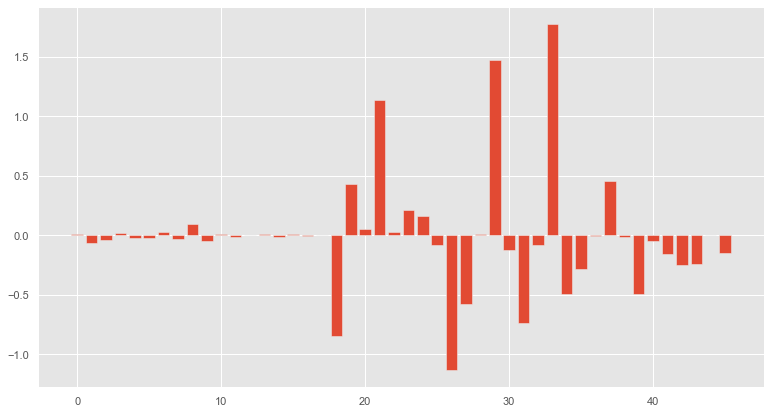

In [63]:
importance = clf.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature {}: {}, SCORE {:.2f}'.format(i,header[i],v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [ ]:
clf = RandomForestClassifier(n_estimators = 50)
clf.fit(X_train,y_train)
prediction = clf.predict(X_test)
accuracy_score(y_test,prediction)

In [ ]:
importance = clf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature {}: {}, SCORE {:.2f}'.format(i,header[i],v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [ ]:
clf.fit(X_train.iloc[:,[0,1,2,3,4]],y_train)
prediction = clf.predict(X_test.iloc[:,[0,1,2,3,4]])
accuracy_score(y_test,prediction)

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 10 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 5, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

In [ ]:
def evaluate(model,test_features,test_labels):
    # evaluating the best model with the parameters found in RandomizedSearchCV
    best_model = model.best_estimator_ # This selects the random forest with the best parameters
    pred = best_model.predict(test_features)
    pred_probs = best_model.predict_proba(test_features)
    logloss_score = log_loss(test_labels, pred_probs)
    
    print('Log loss of the model given the test labels')
    print('Log loss error: {:0.4f}'.format(logloss_score))
    print(classification_report(test_labels,pred))
    
    conf_mat = confusion_matrix(test_labels, pred, normalize='true')      
    plt.figure(1)
    ax1= plt.subplot(1,2,1)
    sns.heatmap(conf_mat, annot=True, ax = ax1, cmap="Blues"); #annot=True to annotate cells

    # labels, title and ticks
    ax1.set_xlabel('Predicted labels');ax1.set_ylabel('True labels'); 
    ax1.set_title('Confusion Matrix'); 
    ax1.xaxis.set_ticklabels(['Injured', 'Not Injured']); ax1.yaxis.set_ticklabels(['Injured','Not Injured']);
    
    ax2 = plt.subplot(1,2,2)
    # Compute ROC curve and ROC area for each class
    roc = metrics.plot_roc_curve(best_model, test_features, test_labels,ax=ax2)
    ax2.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',label='Chance', alpha=.8)

In [ ]:
evaluate(rf_random,X_test,y_test)

## Support Vector Machine


In [ ]:
from sklearn import svm
from sklearn.svm import SVC  
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
clf = svm.SVC()
clf.fit(X_train, y_train)

In [ ]:
prediction = clf.predict(X_test)
accuracy_score(y_test,prediction)

In [ ]:
sns.pairplot(X.iloc[:,[0,1,2,3]],palette='Dark2')

In [ ]:
kernels = ['Polynomial', 'RBF', 'Sigmoid','Linear']
#A function which returns the corresponding SVC model
def getClassifier(ktype):
    if ktype == 0:
        # Polynomial kernal
        return SVC(kernel='poly', degree=8, gamma="auto")
    elif ktype == 1:
        # Radial Basis Function kernal
        return SVC(kernel='rbf', gamma="auto")
    elif ktype == 2:
        # Sigmoid kernal
        return SVC(kernel='sigmoid', gamma="auto")
    elif ktype == 3:
        # Linear kernal
        return SVC(kernel='linear', gamma="auto")

In [ ]:
for i in range(4):
    # Separate data into test and training sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
# Train a SVC model using different kernal
    svclassifier = getClassifier(i) 
    svclassifier.fit(X_train, y_train)
# Make prediction
    y_pred = svclassifier.predict(X_test)
# Evaluate our model
    print("Evaluation:", kernals[i], "kernel")
    print(classification_report(y_test,y_pred))

In [ ]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

In [ ]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

In [ ]:
print(grid.best_estimator_)

In [ ]:
grid_predictions = grid.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))